# Forecasting - CocaCola Sales

### Forecast the CocaCola Sales. 
 Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting.

### Step-1 : Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from numpy import log
from numpy import sqrt
from sklearn.model_selection import train_test_split
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
from sklearn.metrics import mean_squared_error
from pandas.plotting import lag_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing  
import statsmodels.graphics.tsaplots as tsa_plots
sb.set_style('darkgrid')
import warnings as warnings
warnings.filterwarnings("ignore")

### Step-2 : Descriptive analysis

### Step-2.1 : Working with Dataset

#### Loading the Dataset

In [2]:
# Importing the dataset
cc_data = pd.read_excel("CocaCola_Sales_Rawdata.xlsx")

#### Exploring the dataset

In [3]:
# Displaying first ten records
cc_data.head(10)

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [4]:
# Shape of the data
cc_data.shape

(42, 2)

In [5]:
# Summary of the data
cc_data.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [6]:
# Check the data types
cc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


### Step-2.2 : Handling missing values

In [7]:
# Check for Null values
cc_data.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [8]:
# Check for duplicate values
cc_data[cc_data.duplicated()].shape

(0, 2)

In [9]:
cc_data[cc_data.duplicated()]

,Quarter,Sales


<AxesSubplot:>

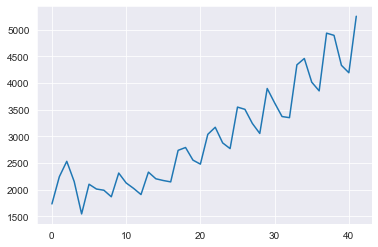

In [10]:
cc_data.Sales.plot()

### Step-3 : Feature Engineering

In [11]:
def separateQuarter(x):
    list_q = x.split('_')
    return list_q[0]

cc_data['Quarters'] = cc_data['Quarter'].apply(separateQuarter)

dummy = pd.DataFrame(pd.get_dummies(cc_data['Quarters']))
cc_data = pd.concat([cc_data,dummy], axis=1)
cc_data

,Quarter,Sales,Quarters,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1,1,0,0,0
5,Q2_87,2104.411995,Q2,0,1,0,0
6,Q3_87,2014.362999,Q3,0,0,1,0
7,Q4_87,1991.746998,Q4,0,0,0,1
8,Q1_88,1869.049999,Q1,1,0,0,0
9,Q2_88,2313.631996,Q2,0,1,0,0


In [12]:
def calculateYear(x):
    items  = x.split('_')
    year   = items[1]
    finalyear = '19'+year
    return int(finalyear)

cc_data['year'] = cc_data['Quarter'].apply(calculateYear)
cc_data.head(5)

,Quarter,Sales,Quarters,Q1,Q2,Q3,Q4,year
0,Q1_86,1734.827000,Q1,1,0,0,0,1986
1,Q2_86,2244.960999,Q2,0,1,0,0,1986
2,Q3_86,2533.804993,Q3,0,0,1,0,1986
3,Q4_86,2154.962997,Q4,0,0,0,1,1986
4,Q1_87,1547.818996,Q1,1,0,0,0,1987


In [13]:
t_list = [x for x in range(1,len(cc_data)+1)]
cc_data['t'] = t_list

cc_data['t_square'] = cc_data['t']*cc_data['t']

#log transformation
cc_data['log_sales'] = log(cc_data.Sales)
cc_data.head(15)

,Quarter,Sales,Quarters,Q1,Q2,Q3,Q4,year,t,t_square,log_sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1986,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,1986,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,1986,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,1986,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,1987,5,25,7.344602
5,Q2_87,2104.411995,Q2,0,1,0,0,1987,6,36,7.651791
6,Q3_87,2014.362999,Q3,0,0,1,0,1987,7,49,7.608058
7,Q4_87,1991.746998,Q4,0,0,0,1,1987,8,64,7.596767
8,Q1_88,1869.049999,Q1,1,0,0,0,1988,9,81,7.533186
9,Q2_88,2313.631996,Q2,0,1,0,0,1988,10,100,7.746574


### Step-4 : Data Visualisation

#### Heat map

<AxesSubplot:xlabel='Quarters', ylabel='year'>

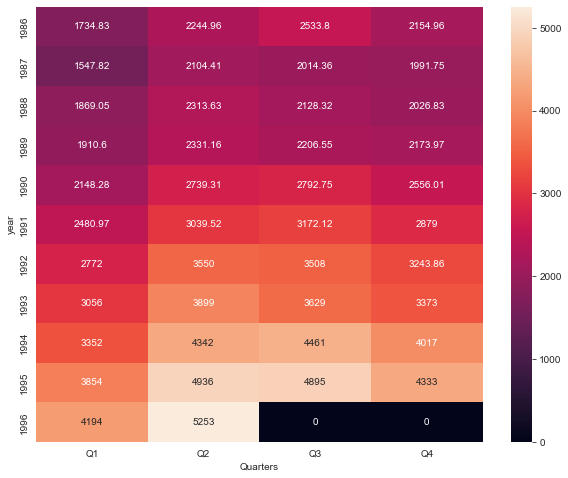

In [14]:
heatmap_Sales = pd.pivot_table(data=cc_data,values='Sales',index='year',
                                    columns='Quarters',aggfunc='mean',fill_value=0)

plt.figure(figsize=(10,8))
sb.heatmap(heatmap_Sales, annot=True, fmt='g')

#### Line plot

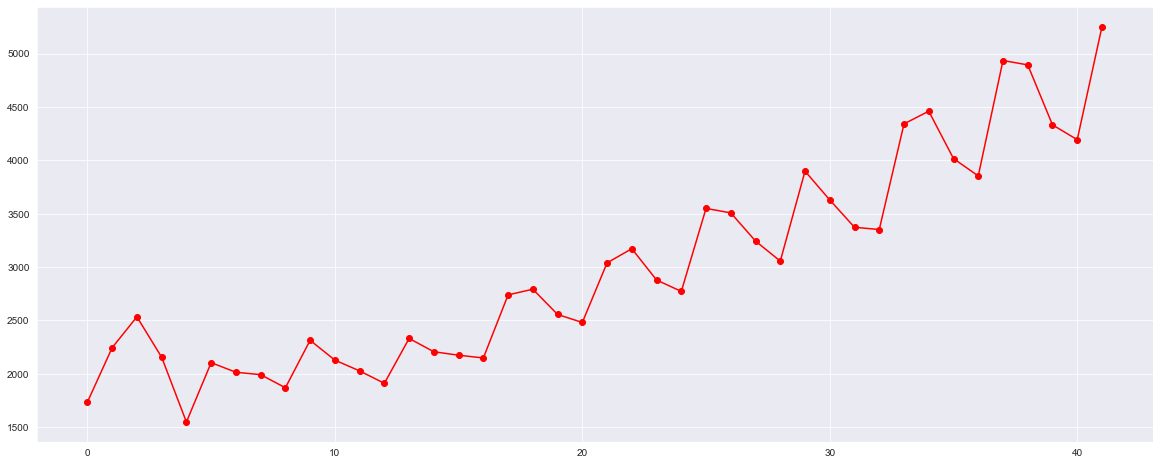

In [15]:
cc_data['Sales'].plot(figsize=(20, 8),color='red',marker='o')
plt.show()

#### Box plot

<AxesSubplot:xlabel='year', ylabel='Sales'>

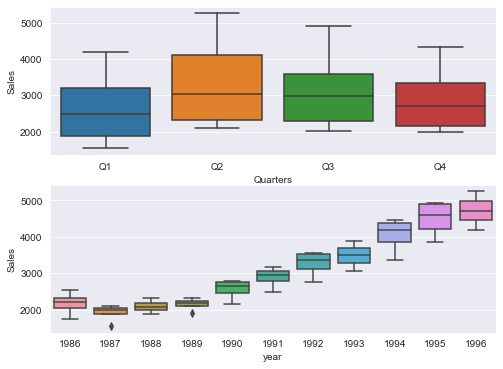

In [16]:
plt.figure(figsize=(8,6))
plt.subplot(211)
sb.boxplot(x='Quarters', y='Sales', data=cc_data)
plt.subplot(212)
sb.boxplot(x='year', y='Sales', data=cc_data)

#### Yearly Sales plot

<AxesSubplot:xlabel='year', ylabel='Sales'>

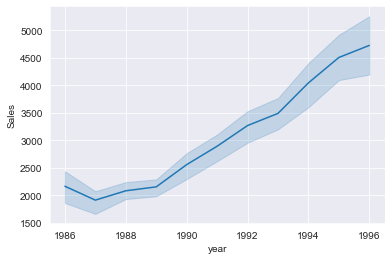

In [17]:
sb.lineplot(x='year',y='Sales',data=cc_data)

#### Quarterly Sales plot

<AxesSubplot:xlabel='Quarters', ylabel='Sales'>

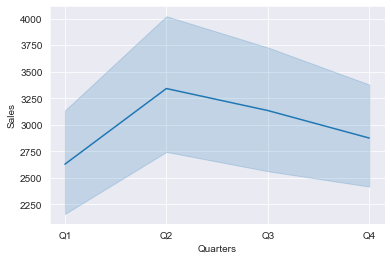

In [18]:
sb.lineplot(x='Quarters',y='Sales',data=cc_data)

#### Histogram

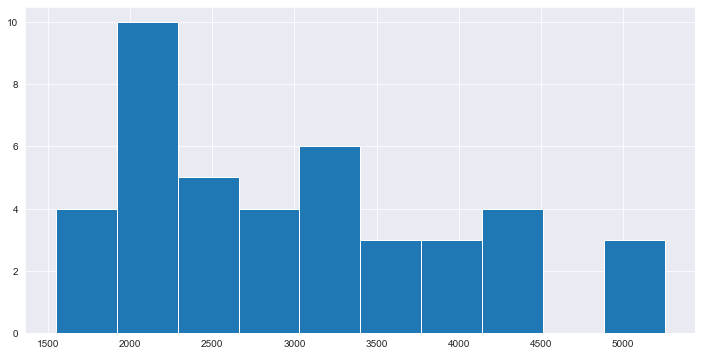

In [19]:
cc_data.Sales.hist(figsize=(12,6))
plt.show()

#### Density plot

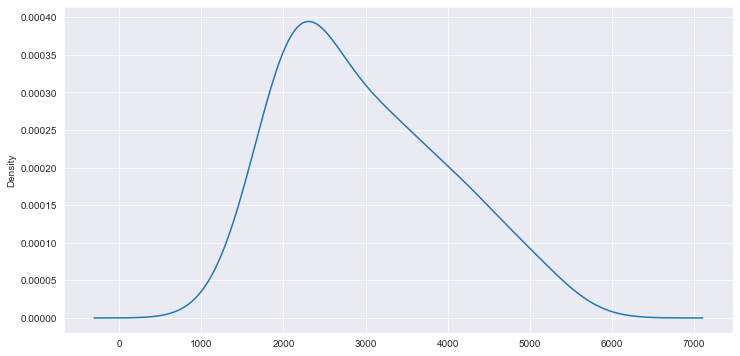

In [20]:
cc_data.Sales.plot(kind='kde', figsize=(12,6))
plt.show()

#### Lag plot

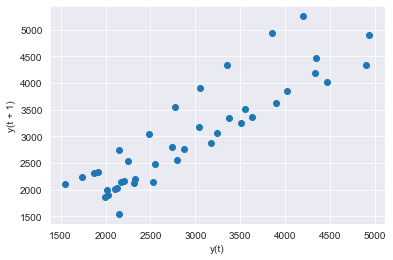

In [21]:
lag_plot(cc_data.Sales)
plt.show()

#### Plotting Moving Average

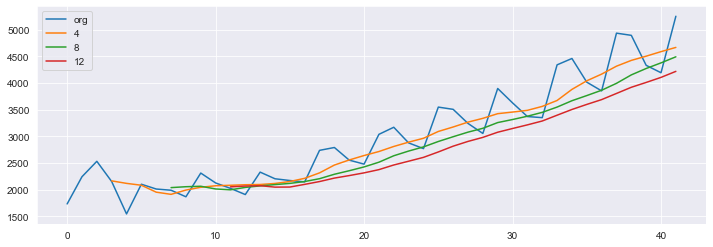

In [22]:
plt.figure(figsize=(12,4))
cc_data.Sales.plot(label="org")
for i in range(4,13,4):
    cc_data["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best') 

#### Time series decomposition plot 

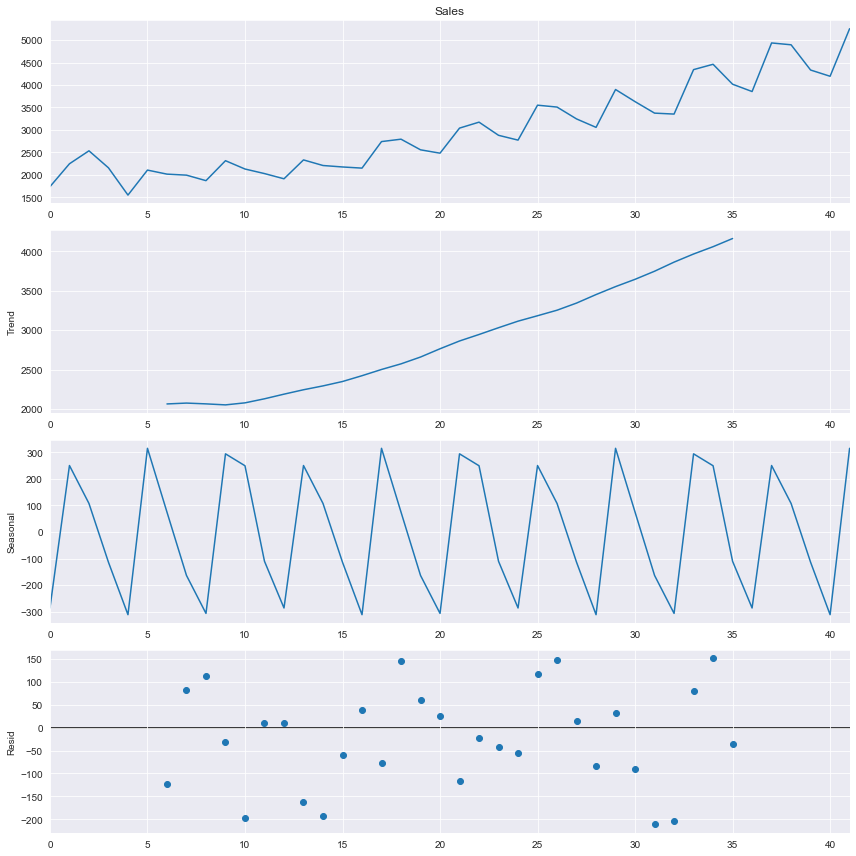

In [23]:
decompose_ts_add = seasonal_decompose(cc_data.Sales,period=12)
with plt.rc_context():
    plt.rc("figure", figsize=(12,12))
    decompose_ts_add.plot()
    plt.show()

### ACF plots and PACF plots

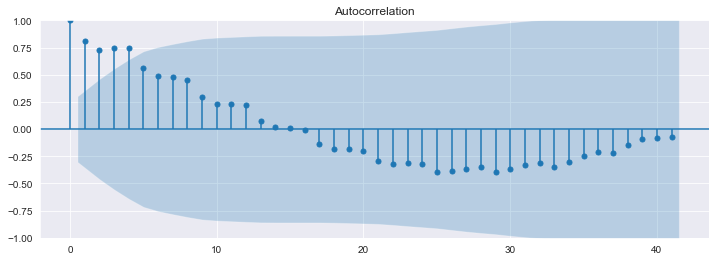

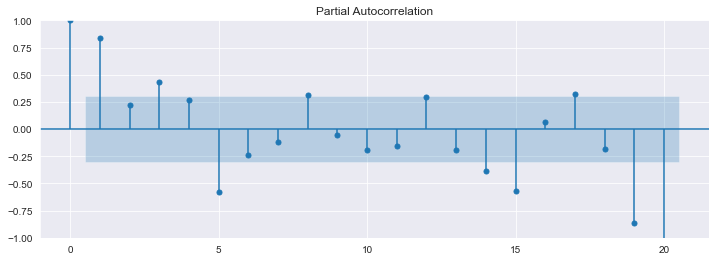

In [24]:
with plt.rc_context():
    plt.rc("figure", figsize=(12,4))
    tsa_plots.plot_acf(cc_data.Sales,lags=41)
    tsa_plots.plot_pacf(cc_data.Sales,lags=20)
    plt.show()

### Step-5 : Split the data into training and testing data

In [25]:
x_train = cc_data.head(30)
x_test  = cc_data.tail(12)
x_train

,Quarter,Sales,Quarters,Q1,Q2,Q3,Q4,year,t,t_square,log_sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1986,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,1986,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,1986,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,1986,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,1987,5,25,7.344602
5,Q2_87,2104.411995,Q2,0,1,0,0,1987,6,36,7.651791
6,Q3_87,2014.362999,Q3,0,0,1,0,1987,7,49,7.608058
7,Q4_87,1991.746998,Q4,0,0,0,1,1987,8,64,7.596767
8,Q1_88,1869.049999,Q1,1,0,0,0,1988,9,81,7.533186
9,Q2_88,2313.631996,Q2,0,1,0,0,1988,10,100,7.746574


### Step-6 : Build different models for Forecasting

#### Evaluation Metric MAPE

In [26]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

### Step-6.1 : Data-Driven Techniques

#### Simple Exponential Method

In [27]:
model_ses = SimpleExpSmoothing(x_train["Sales"]).fit(smoothing_level=0.2)
pred_ses = model_ses.predict(start = x_test.index[0],end = x_test.index[-1])
mape_ses = np.round(MAPE(pred_ses,x_test.Sales),2)  
rmse_ses = np.round(np.sqrt(mean_squared_error(pred_ses,x_test.Sales)),2)
print("Mean Absolute Percentage Error : ",mape_ses)
print("Root Mean Square Error : ",rmse_ses)

Mean Absolute Percentage Error :  22.05
Root Mean Square Error :  1153.7


#### Holt's Method (Double Exponential Method)

In [28]:
model_h = Holt(x_train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_h = model_h.predict(start = x_test.index[0],end = x_test.index[-1])
mape_h = np.round(MAPE(pred_h,x_test.Sales),2)
rmse_h = np.round(np.sqrt(mean_squared_error(pred_h,x_test.Sales)),2)
print("Mean Absolute Percentage Error : ",mape_h)
print("Root Mean Square Error : ",rmse_h)

Mean Absolute Percentage Error :  11.21
Root Mean Square Error :  559.52


#### Holt-Winter's Exponential Smoothing with Additive Seasonality and Trend (Triple Exponential Method)

In [29]:
model_hw_as_at = ExponentialSmoothing(x_train["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit(optimized=True)
pred_hw_as_at = model_hw_as_at.predict(start = x_test.index[0],end = x_test.index[-1])
mape_hw_as_at = np.round(MAPE(pred_hw_as_at,x_test.Sales),2)
rmse_hw_as_at = np.round(np.sqrt(mean_squared_error(pred_hw_as_at,x_test.Sales)),2)
print("Mean Absolute Percentage Error : ",mape_hw_as_at)
print("Root Mean Square Error : ",rmse_hw_as_at)

Mean Absolute Percentage Error :  5.32
Root Mean Square Error :  245.25


#### Holt-Winter's Exponential Smoothing with Multiplicative Seasonality and Additive Trend (Triple Exponential Method)

In [30]:
model_hw_ms_at = ExponentialSmoothing(x_train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit(optimized=True)
pred_hw_ms_at = model_hw_ms_at.predict(start = x_test.index[0],end = x_test.index[-1])
mape_hw_ms_at = np.round(MAPE(pred_hw_ms_at,x_test.Sales),2)
rmse_hw_ms_at = np.round(np.sqrt(mean_squared_error(pred_hw_ms_at,x_test.Sales)),2)
print("Mean Absolute Percentage Error : ",mape_hw_ms_at)
print("Root Mean Square Error : ",rmse_hw_ms_at)

Mean Absolute Percentage Error :  9.33
Root Mean Square Error :  470.62


#### Holt-Winter's Exponential Smoothing with Additive Seasonality and Multiplicative Trend (Triple Exponential Method)

In [31]:
model_hw_as_mt = ExponentialSmoothing(x_train["Sales"],seasonal="add",trend="mul",seasonal_periods=12).fit(optimized=True)
pred_hw_as_mt = model_hw_as_mt.predict(start = x_test.index[0],end = x_test.index[-1])
mape_hw_as_mt = np.round(MAPE(pred_hw_as_mt,x_test.Sales),2)
rmse_hw_as_mt =np.round(np.sqrt(mean_squared_error(pred_hw_as_mt,x_test.Sales)),2)
print("Mean Absolute Percentage Error : ",mape_hw_as_mt)
print("Root Mean Square Error : ",rmse_hw_as_mt)

Mean Absolute Percentage Error :  5.52
Root Mean Square Error :  243.53


#### Holt-Winter's Exponential Smoothing with Multiplicative Seasonality and Multiplicative Trend (Triple Exponential Method)

In [32]:
model_hw_ms_mt = ExponentialSmoothing(x_train["Sales"],seasonal="mul",trend="mul",seasonal_periods=12).fit(optimized=True)
pred_hw_ms_mt = model_hw_ms_mt.predict(start = x_test.index[0],end = x_test.index[-1])
mape_hw_ms_mt = np.round(MAPE(pred_hw_ms_mt,x_test.Sales),2)
rmse_hw_ms_mt = np.round(np.sqrt(mean_squared_error(pred_hw_ms_mt,x_test.Sales)),2)
print("Mean Absolute Percentage Error : ",mape_hw_ms_mt)
print("Root Mean Square Error : ",rmse_hw_ms_mt)

Mean Absolute Percentage Error :  3.64
Root Mean Square Error :  182.99


In [33]:
# grid search ARIMA parameters for a time series

# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.70)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [34]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))  

In [35]:
# evaluate parameters
train = pd.read_excel('CocaCola_Sales_Rawdata.xlsx', index_col=0, parse_dates=True, squeeze=True)
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
evaluate_models(train.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=1574.797
ARIMA(0, 0, 1) RMSE=1080.505
ARIMA(0, 0, 2) RMSE=664.875
ARIMA(0, 1, 0) RMSE=601.060
ARIMA(0, 1, 1) RMSE=562.618
ARIMA(0, 1, 2) RMSE=542.497
ARIMA(0, 2, 0) RMSE=842.628
ARIMA(0, 2, 1) RMSE=593.107
ARIMA(0, 2, 2) RMSE=476.146
ARIMA(1, 0, 0) RMSE=641.904
ARIMA(1, 0, 1) RMSE=589.743
ARIMA(1, 0, 2) RMSE=568.900
ARIMA(1, 1, 0) RMSE=600.086
ARIMA(1, 1, 1) RMSE=567.044
ARIMA(1, 1, 2) RMSE=543.736
ARIMA(1, 2, 0) RMSE=847.502
ARIMA(1, 2, 1) RMSE=637.202
ARIMA(1, 2, 2) RMSE=562.783
ARIMA(2, 0, 0) RMSE=644.800
ARIMA(2, 0, 1) RMSE=629.142
ARIMA(2, 0, 2) RMSE=570.164
ARIMA(2, 1, 0) RMSE=458.597
ARIMA(2, 1, 1) RMSE=489.849
ARIMA(2, 1, 2) RMSE=362.937
ARIMA(2, 2, 0) RMSE=699.722
ARIMA(2, 2, 1) RMSE=418.129
ARIMA(2, 2, 2) RMSE=368.542
Best ARIMA(2, 1, 2) RMSE=362.937


In [36]:
# prepare data
X = x_train.copy()
X = X.iloc[:,:2]
X = X.set_index('Quarter')
X = X.astype('float32') 

In [37]:
# fit model
model_arima = ARIMA(X, order=(2,1,2)).fit()
pred_arima = model_arima.predict(start = x_test.index[0],end = x_test.index[-1])
mape_arima = np.round(MAPE(pred_arima.values,x_test.Sales.values),2)
rmse_arima = np.round(np.sqrt(mean_squared_error(pred_arima,x_test.Sales)),2)
print("Mean Absolute Percentage Error : ",mape_arima)
print("Root Mean Square Error : ",rmse_arima)

Mean Absolute Percentage Error :  13.6
Root Mean Square Error :  713.82


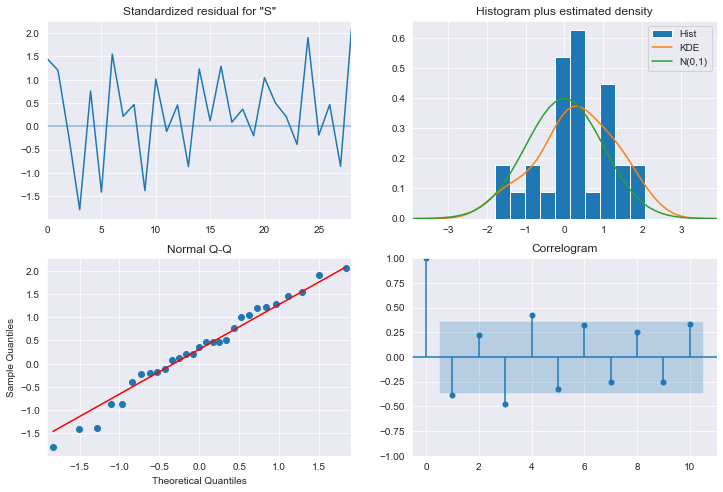

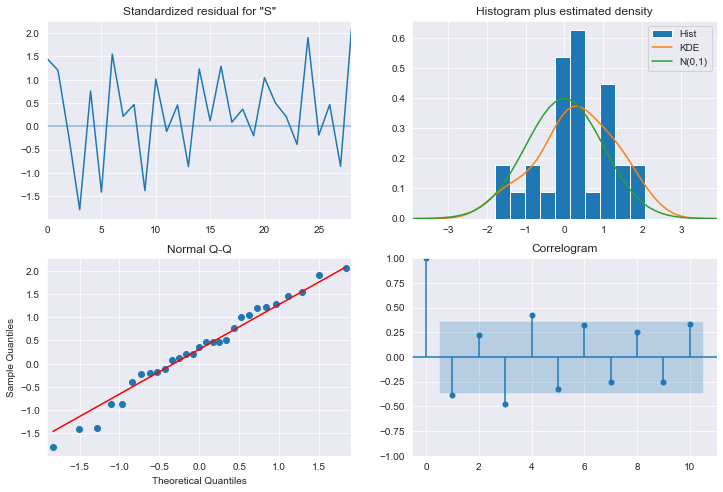

In [38]:
model_arima.plot_diagnostics(figsize=(12,8)) 

### Step-6.1.1 : Comparing the results

In [39]:
pd.set_option('max_colwidth',100)

In [40]:
model_list                = ["SES Method","Holt's Method",
                             "H-W's Exp. Smooothing with Add. Seasonality and Trend",
                             "H-W's Exp. Smoothing with Mul. Seasonality and Add. Trend",
                             "H-W's Exp. Smoothing with Add. Seasonality and Mul. Trend",
                             "H-W's Exp. Smoothing with Mul. Seasonality and Mul. Trend",
                             "ARIMA"
                            ]
rmse_val_list             = [rmse_ses,rmse_h,rmse_hw_as_at,rmse_hw_ms_at,rmse_hw_as_mt,rmse_hw_ms_mt
                             ,rmse_arima]

table_rmse                = pd.DataFrame(columns=['Model','RMSE_Values'])
table_rmse['Model']       = model_list
table_rmse['RMSE_Values'] = rmse_val_list
table_rmse.sort_values('RMSE_Values')

,Model,RMSE_Values
5,H-W's Exp. Smoothing with Mul. Seasonality and Mul. Trend,182.99
4,H-W's Exp. Smoothing with Add. Seasonality and Mul. Trend,243.53
2,H-W's Exp. Smooothing with Add. Seasonality and Trend,245.25
3,H-W's Exp. Smoothing with Mul. Seasonality and Add. Trend,470.62
1,Holt's Method,559.52
6,ARIMA,713.82
0,SES Method,1153.70


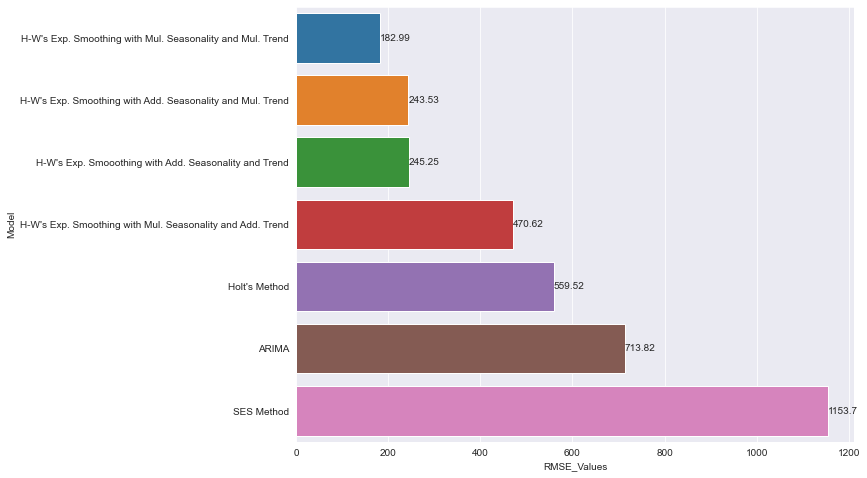

In [41]:
plt.figure(figsize=(10,8))
ax = sb.barplot(x='RMSE_Values',y='Model',data=table_rmse,order=table_rmse.sort_values('RMSE_Values').Model)
for i in ax.containers:
    ax.bar_label(i)

### Step-6.2 : Model-Based Techniques

#### Linear Model

In [42]:
model_lin     = smf.ols('Sales~t',data=x_train).fit()
predicted_lin = pd.Series(model_lin.predict(pd.DataFrame(x_test['t'])))
rmse_lin      = np.sqrt(np.mean(np.array(x_test['Sales'])-np.array(predicted_lin))**2)
rmse_lin      = round(rmse_lin,2)
rmse_lin

545.51

#### Exponential Model

In [43]:
model_exp = smf.ols('log_sales~t',data=x_train).fit()
pred_exp  = pd.Series(model_exp.predict(pd.DataFrame(x_test['t'])))
rmse_exp  = np.sqrt(np.mean((np.array(x_test['log_sales'])-np.array(np.exp(pred_exp)))**2))
rmse_exp  = round(rmse_exp,2)
rmse_exp

3862.67

#### Quadratic 

In [44]:
model_quad = smf.ols('Sales~t+t_square',data=x_train).fit()
pred_quad = pd.Series(model_quad.predict(x_test[["t","t_square"]]))
rmse_quad = np.sqrt(np.mean((np.array(x_test['Sales'])-np.array(pred_quad))**2))
rmse_quad = round(rmse_quad,2)
rmse_quad

646.27

#### Additive seasonality 

In [45]:
model_add_sea = smf.ols('Sales~Q1+Q2+Q3+Q4',data=x_train).fit()
pred_add_sea = pd.Series(model_add_sea.predict(x_test[['Q1','Q2','Q3','Q4']]))
rmse_add_sea = np.sqrt(np.mean((np.array(x_test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea = round(rmse_add_sea,2)
rmse_add_sea

1778.01

#### Additive Seasonality Quadratic 

In [46]:
model_add_sea_quad = smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=x_train).fit()
pred_add_sea_quad = pd.Series(model_add_sea_quad.predict(x_test[['Q1','Q2','Q3','Q4','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(x_test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad = round(rmse_add_sea_quad,2)
rmse_add_sea_quad

586.05

#### Multiplicative Seasonality

In [47]:
model_mul_sea = smf.ols('log_sales~Q1+Q2+Q3+Q4',
                  data = x_train).fit()
pred_mul_sea = pd.Series(model_mul_sea.predict(x_test))
rmse_mul_sea = np.sqrt(np.mean((np.array(x_test['Sales'])-np.array(np.exp(pred_mul_sea)))**2))
rmse_mul_sea = round(rmse_mul_sea,2)
rmse_mul_sea

1828.92

#### Multiplicative Additive Seasonality 

In [48]:
model_mul_add_sea = smf.ols('log_sales~t+Q1+Q2+Q3+Q4',data = x_train).fit()
pred_mul_add_sea = pd.Series(model_mul_add_sea.predict(x_test))
rmse_mul_add_sea = np.sqrt(np.mean((np.array(x_test['Sales'])-np.array(np.exp(pred_mul_add_sea)))**2))
rmse_mul_add_sea = round(rmse_mul_add_sea,2)
rmse_mul_add_sea

410.25

### Step-6.2.1 : Comparing the results

In [49]:
model_list                = ["Linear","Exponential","Quadratic","Additive Seasonality","Additive Seasonality Quadratic","Multiplicative Seasonality",
                                 "Multiplicative Additive Seasonality"]
rmse_val_list             = [rmse_lin,rmse_exp,rmse_quad,rmse_add_sea,rmse_add_sea_quad,rmse_mul_sea,
                                 rmse_mul_add_sea]

table_rmse                = pd.DataFrame(columns=['Model','RMSE Values'])
table_rmse['Model']       = model_list
table_rmse['RMSE Values'] = rmse_val_list

table_rmse.sort_values(by=['RMSE Values'])

,Model,RMSE Values
6,Multiplicative Additive Seasonality,410.25
0,Linear,545.51
4,Additive Seasonality Quadratic,586.05
2,Quadratic,646.27
3,Additive Seasonality,1778.01
5,Multiplicative Seasonality,1828.92
1,Exponential,3862.67


### Step-7 : Predict for new time period

#### Out of all the models, Holt-Winter's Exponential Smoothing with Multiplicative Seasonality and Multiplicative Trend (Triple Exponential Method) gave the lowest error. Hence use this model for forecasting.

In [50]:
new_data = cc_data.iloc[36:42,:2]
new_data

,Quarter,Sales
36,Q1_95,3854.0
37,Q2_95,4936.0
38,Q3_95,4895.0
39,Q4_95,4333.0
40,Q1_96,4194.0
41,Q2_96,5253.0


In [51]:
cc_data1 = cc_data.iloc[:36,:2]
print(cc_data1.shape)
cc_data1

(36, 2)


,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [52]:
#picked the model with the lowest RMSE value
#training the model on the entire dataset
final_model = ExponentialSmoothing(cc_data1["Sales"],seasonal="mul",trend="mul",seasonal_periods=12).fit(optimized=True)

In [53]:
predicted_new = final_model.predict(start = new_data.index[0],end = new_data.index[-1])
predicted_new

36    3830.980495
37    4898.643166
38    5000.425737
39    4643.912380
40    4244.033027
41    5514.186429
dtype: float64

In [54]:
new_data['forecasted_sales'] = predicted_new
new_data.drop(columns='Sales',axis=1,inplace=True)

In [55]:
new_data

,Quarter,forecasted_sales
36,Q1_95,3830.980495
37,Q2_95,4898.643166
38,Q3_95,5000.425737
39,Q4_95,4643.912380
40,Q1_96,4244.033027
41,Q2_96,5514.186429


<AxesSubplot:>

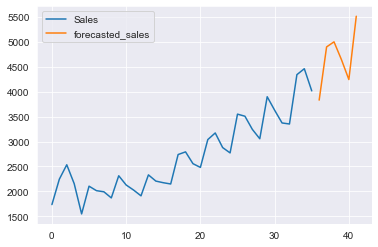

In [56]:
new_var = pd.concat([cc_data1,new_data])
new_var[['Sales','forecasted_sales']].reset_index(drop=True).plot()